<a href="https://colab.research.google.com/github/Sujan-Sawant/FlipItNews-NLP-Case-Study/blob/main/FlipItNews_Case_Studyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloding the data
! gdown 1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u

Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 26.0MB/s]


In [ ]:
# Importing libraries
import os
import re
import random
import string      # for string operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
# SetUp NLTK
!pip install --user -U nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/flipitnews-data.csv")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,Category,Article
2220,Business,cars pull down us retail figures us retail sal...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...
2223,Politics,how political squabbles snowball it s become c...
2224,Sports,souness delight at euro progress boss graeme s...


## Exploratory Data Analysis

In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
df.shape

(2225, 2)

In [ ]:
# Retrieving the column labels (names) of a DataFrame .
df.columns

Index(['Category', 'Article'], dtype='object')

In [ ]:
# Retrieving the information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

,0
Category,0
Article,0


In [ ]:
# Checking the values in each category
df["Category"].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


In [ ]:
fig = px.pie(df, names="Category",hole=0.3, title="Category Pie Chart")
fig.show()

### Create a user defined function to process the textual data (news articles).
- Remove non-letters
- Remove Stopwords
- Word Tokenize the text
- Perform Lemmatization


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources (only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def preprocess_text(text):
    # Remove non-letters using regex
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)


In [ ]:
sample_text = "Breaking NEWS: The stock market crashed in 2025 due to economic crisis!"
processed = preprocess_text(sample_text)
print(processed)


breaking news stock market crashed due economic crisis


In [ ]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
df["Processed_Article"] = df["Article"].apply(preprocess_text)


In [ ]:
df.head()

,Category,Article,Processed_Article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


### Target Encoding

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Encoded_Category"] = le.fit_transform(df["Category"])

In [ ]:
df.head()

,Category,Article,Processed_Article,Encoded_Category
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


### Create an option for the user to choose between Bag of Words and TF-IDF techniques for vectorizing the data.

In [ ]:
df.head()

,Category,Article,Processed_Article,Encoded_Category
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create choice for user
choice = input("Choose vectorizer (bow/tfidf): ").strip().lower()

if choice == "tfidf":
    vectorizer = TfidfVectorizer()
elif choice == "bow":
    vectorizer = CountVectorizer()
else:
    print("Invalid choice, using Bag of Words by default.")
    vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df["Processed_Article"])
y = df["Encoded_Category"]


Choose vectorizer (bow/tfidf): bow


### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [ ]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--------- {name} Performance ---------")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("-"*50)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()




### Evaluation of Naive Bayes Model


--------- Naive Bayes Performance ---------
Accuracy: 0.9662921348314607
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

     Business       0.98      0.94      0.96       101
Entertainment       1.00      0.91      0.95        81
     Politics       0.92      0.99      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.94      0.99      0.96        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



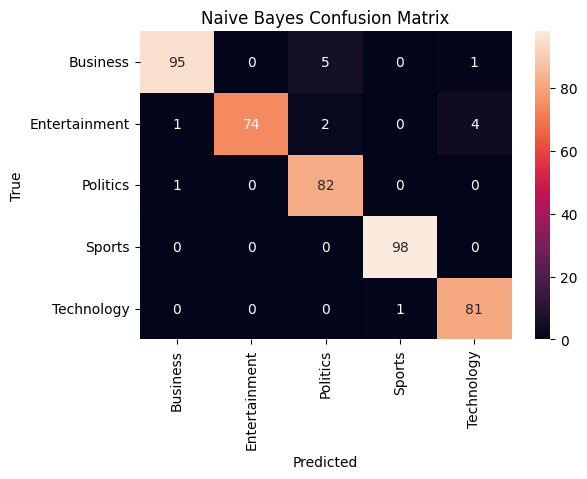

In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
evaluate_model(nb_model, "Naive Bayes")

### Train & Evaluate Other Models

#### Decision Tree


--------- Decision Tree Performance ---------
Accuracy: 0.8471910112359551
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

     Business       0.82      0.80      0.81       101
Entertainment       0.91      0.79      0.85        81
     Politics       0.80      0.90      0.85        83
       Sports       0.89      0.91      0.90        98
   Technology       0.83      0.83      0.83        82

     accuracy                           0.85       445
    macro avg       0.85      0.85      0.85       445
 weighted avg       0.85      0.85      0.85       445



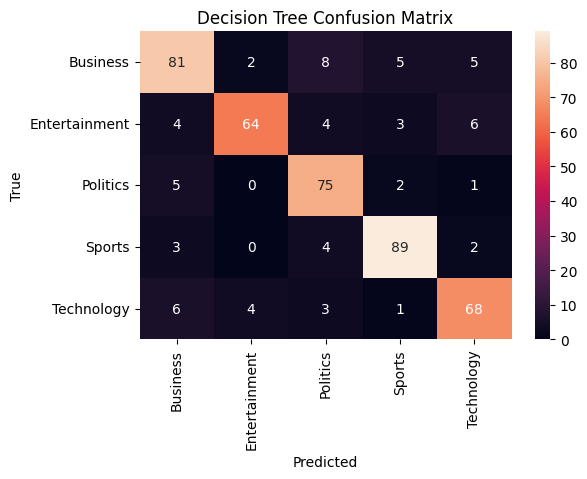

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, "Decision Tree")

#### K-Nearest Neighbors



--------- K-Nearest Neighbors Performance ---------
Accuracy: 0.6853932584269663
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

     Business       0.86      0.67      0.76       101
Entertainment       0.91      0.53      0.67        81
     Politics       0.88      0.81      0.84        83
       Sports       0.46      1.00      0.63        98
   Technology       1.00      0.35      0.52        82

     accuracy                           0.69       445
    macro avg       0.82      0.67      0.68       445
 weighted avg       0.81      0.69      0.69       445



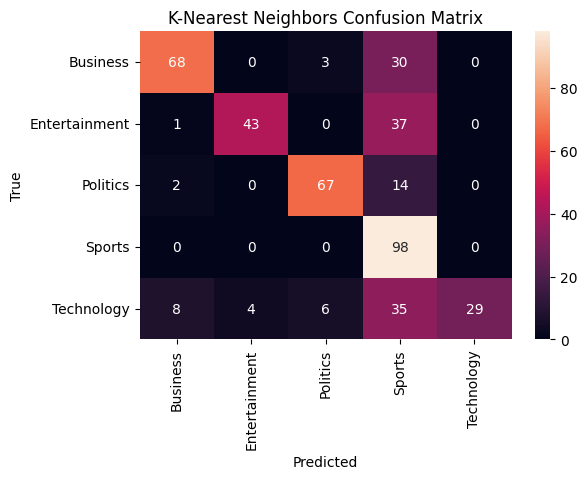

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, "K-Nearest Neighbors")



#### Random Forest


--------- Random Forest Performance ---------
Accuracy: 0.952808988764045
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

     Business       0.91      0.93      0.92       101
Entertainment       1.00      0.94      0.97        81
     Politics       0.94      0.95      0.95        83
       Sports       0.97      0.99      0.98        98
   Technology       0.95      0.95      0.95        82

     accuracy                           0.95       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



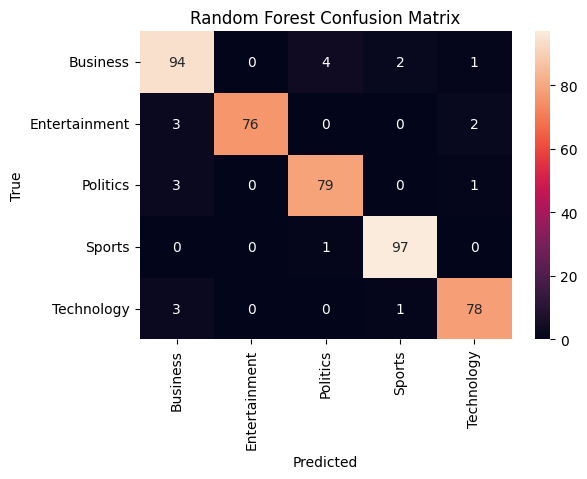

In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
evaluate_model(rf_model, "Random Forest")

### **Observations and Inference**

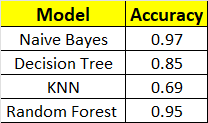

**1. Naive Bayes -** Accuracy: 0.97 (Best Performer)
- **Observations:**
 - Extremely high accuracy (97%) and balanced precision/recall across all classes.
 - Especially strong in Sports (Precision & Recall: ~1.0) and Politics (Recall: 0.99).

- **Inference:**
 - This is the most suitable model for this dataset in terms of performance.
 - Almost no overfitting signs — training and test performance likely close.

**2. Random Forest -** Accuracy: 0.95 (Second Best)
- **Observations:**
 - Very consistent performance across all categories (Precision/Recall ~0.94–0.99).

- **Inference:**
 - Accuracy score is slightly below Naive Bayes, it provides robustness and can capture non-linear relationships.


**3. Decision Tree -**Accuracy: 0.85
 - **Observations:**
  - Decent accuracy, but lower than Naive bayes and Random forest model.
  - Performs well in Sports (Recall: 0.91) and Politics (Recall: 0.90), but slightly weaker in Entertainment (Recall: 0.79).




**4. K-Nearest Neighbors -** Accuracy: 0.69 (Weakest model amongst four)
- **Observations:**
 - High precision in some categories (Technology: 1.0) but very poor recall (0.35).
 - Sports recall is perfect (1.0), but precision is low (0.46), indicating many false positives.

- **Inference:**
 - Not well-suited for this type of problem.

#### **Questionnaire**

1. How many news articles are present in the dataset that we have?
 - There are 2225 articles presnt in the dataset that we have.

In [ ]:
df["Article"].count()

np.int64(2225)

2. Most of the news articles are from _____ category.
 - Most of the news articles are from **Sports** category.

In [ ]:
df["Category"].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


3. Only ___ no. of articles belong to the ‘Technology’ category.
 - Only **401** no. of articles belong to the ‘Technology’ category.

In [ ]:
df["Category"].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


4.What are Stop Words and why should they be removed from the text data?
 - Stop Words are common words in a language (like the, is, in, and, of, to) that usually don't add much meaning in the text.

 - For example, in the sentence:
  - The cat is sitting on the mat.
  - The words cat, sitting, and mat contains the main meaning, while the, is, and on are stop words.

 - Why remove them?
  - They appear very frequently in almost every document, which can add noise to the data.
  - They increase the dimensionality in the data without improving accuracy.
  - By Removing them makes text processing more efficient and can improve model performance by focusing on meaningful words.

5. Explain the difference between Stemming and Lemmatization.

Stemming and Lemmatization are both techniques used in text preprocessing to reduce words to their base form.
**1. Stemming:**
- Stemming is a quick method that trims prefixes or suffixes to get to the root of a word.
- It follows simple chopping rules without checking if the result is an actual word.
- For example:
 - running ----> run
 - studies ----> studi
- It's fast and easy to apply, but sometimes it produces non-dictionary words and can slightly distort meaning.

**2. Lemmatization:**
- Lemmatization finds the meaningful base form of a word, called a lemma, by using vocabulary and grammar rules.
- It looks at the context and part of speech to decide the correct base form.
- For example:
 - running (verb) ----> run
 - better (adjective) ----> good
- It's more accurate and always produces real words, but it's slower because it relies on dictionaries and part-of-speech tagging.

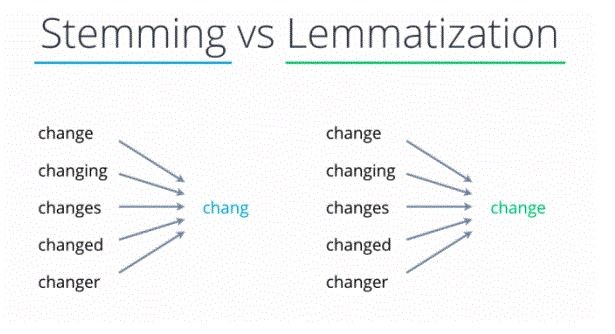


6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?
- TF-IDF is generally considered more efficient than Bag of Words when it comes to capturing the importance of words in text.
- Bag of Words simply counts how many times each word appears, but TF-IDF takes it further by reducing the weight of words that show up in almost every document and giving more importance to words that are unique or carry more meaning.
- This usually leads to better performance in text classification tasks because the model focuses more on meaningful words rather than just frequent ones.

7. What's the shape of train & test data sets after performing a 75:25 split.
- Train set shape: (1668, 2)
- Test set shape: (557, 2)






8. Which of the following is found to be the best performing model.
a. Random Forest b. Nearest Neighbors c. Naive Bayes
- Naive Bayes with accuracy of 97%




9. According to this particular use case, both precision and recall are equally important. (T/F).
- True